# Diamond Price Prediction (Regression) 

## Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Importing Dataset

In [2]:
Diamond_df=pd.read_csv('/kaggle/input/diamonds/diamonds.csv')
Diamond_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# EDA( Exploratory Data Analysis)

## Data Understanding

In [3]:
Diamond_df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
Diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
row, column=Diamond_df.shape
print("Row of Dataframe:",row)
print("Column of Dataframe", column)

Row of Dataframe: 53940
Column of Dataframe 11


In [6]:
Diamond_df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [7]:
Duplicated_data=Diamond_df.duplicated().sum()
print("Sum Of Duplicated data:", Duplicated_data)

Sum Of Duplicated data: 0


## Visualization

### Categorical Feature Distribution

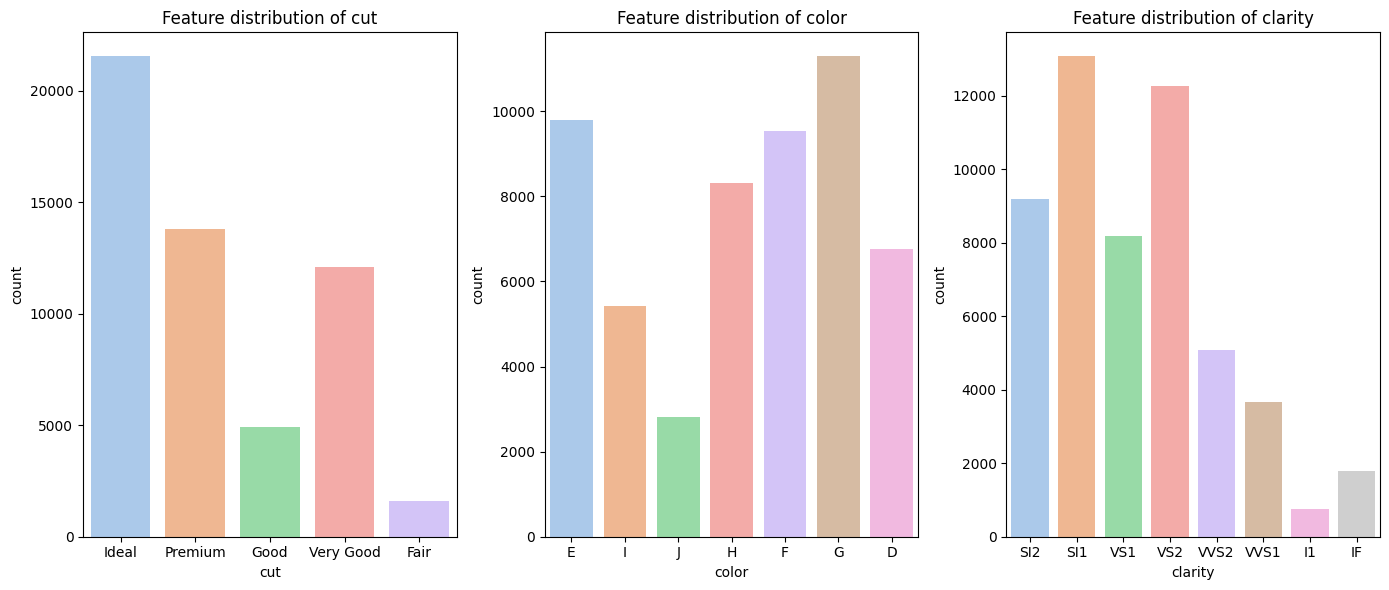

In [8]:
categorical_feature=Diamond_df.select_dtypes(include='object').columns
fig, axes=plt.subplots(1, len(categorical_feature), figsize=(14,6))
axes=axes.flatten()
for i, feature in enumerate(categorical_feature):
    sns.countplot(x=Diamond_df[feature],data=Diamond_df, palette='pastel',ax=axes[i])
    axes[i].set_title(f'Feature distribution of {feature}')

plt.tight_layout()
plt.show()

###  Boxplot Visualization of Numerical Feature

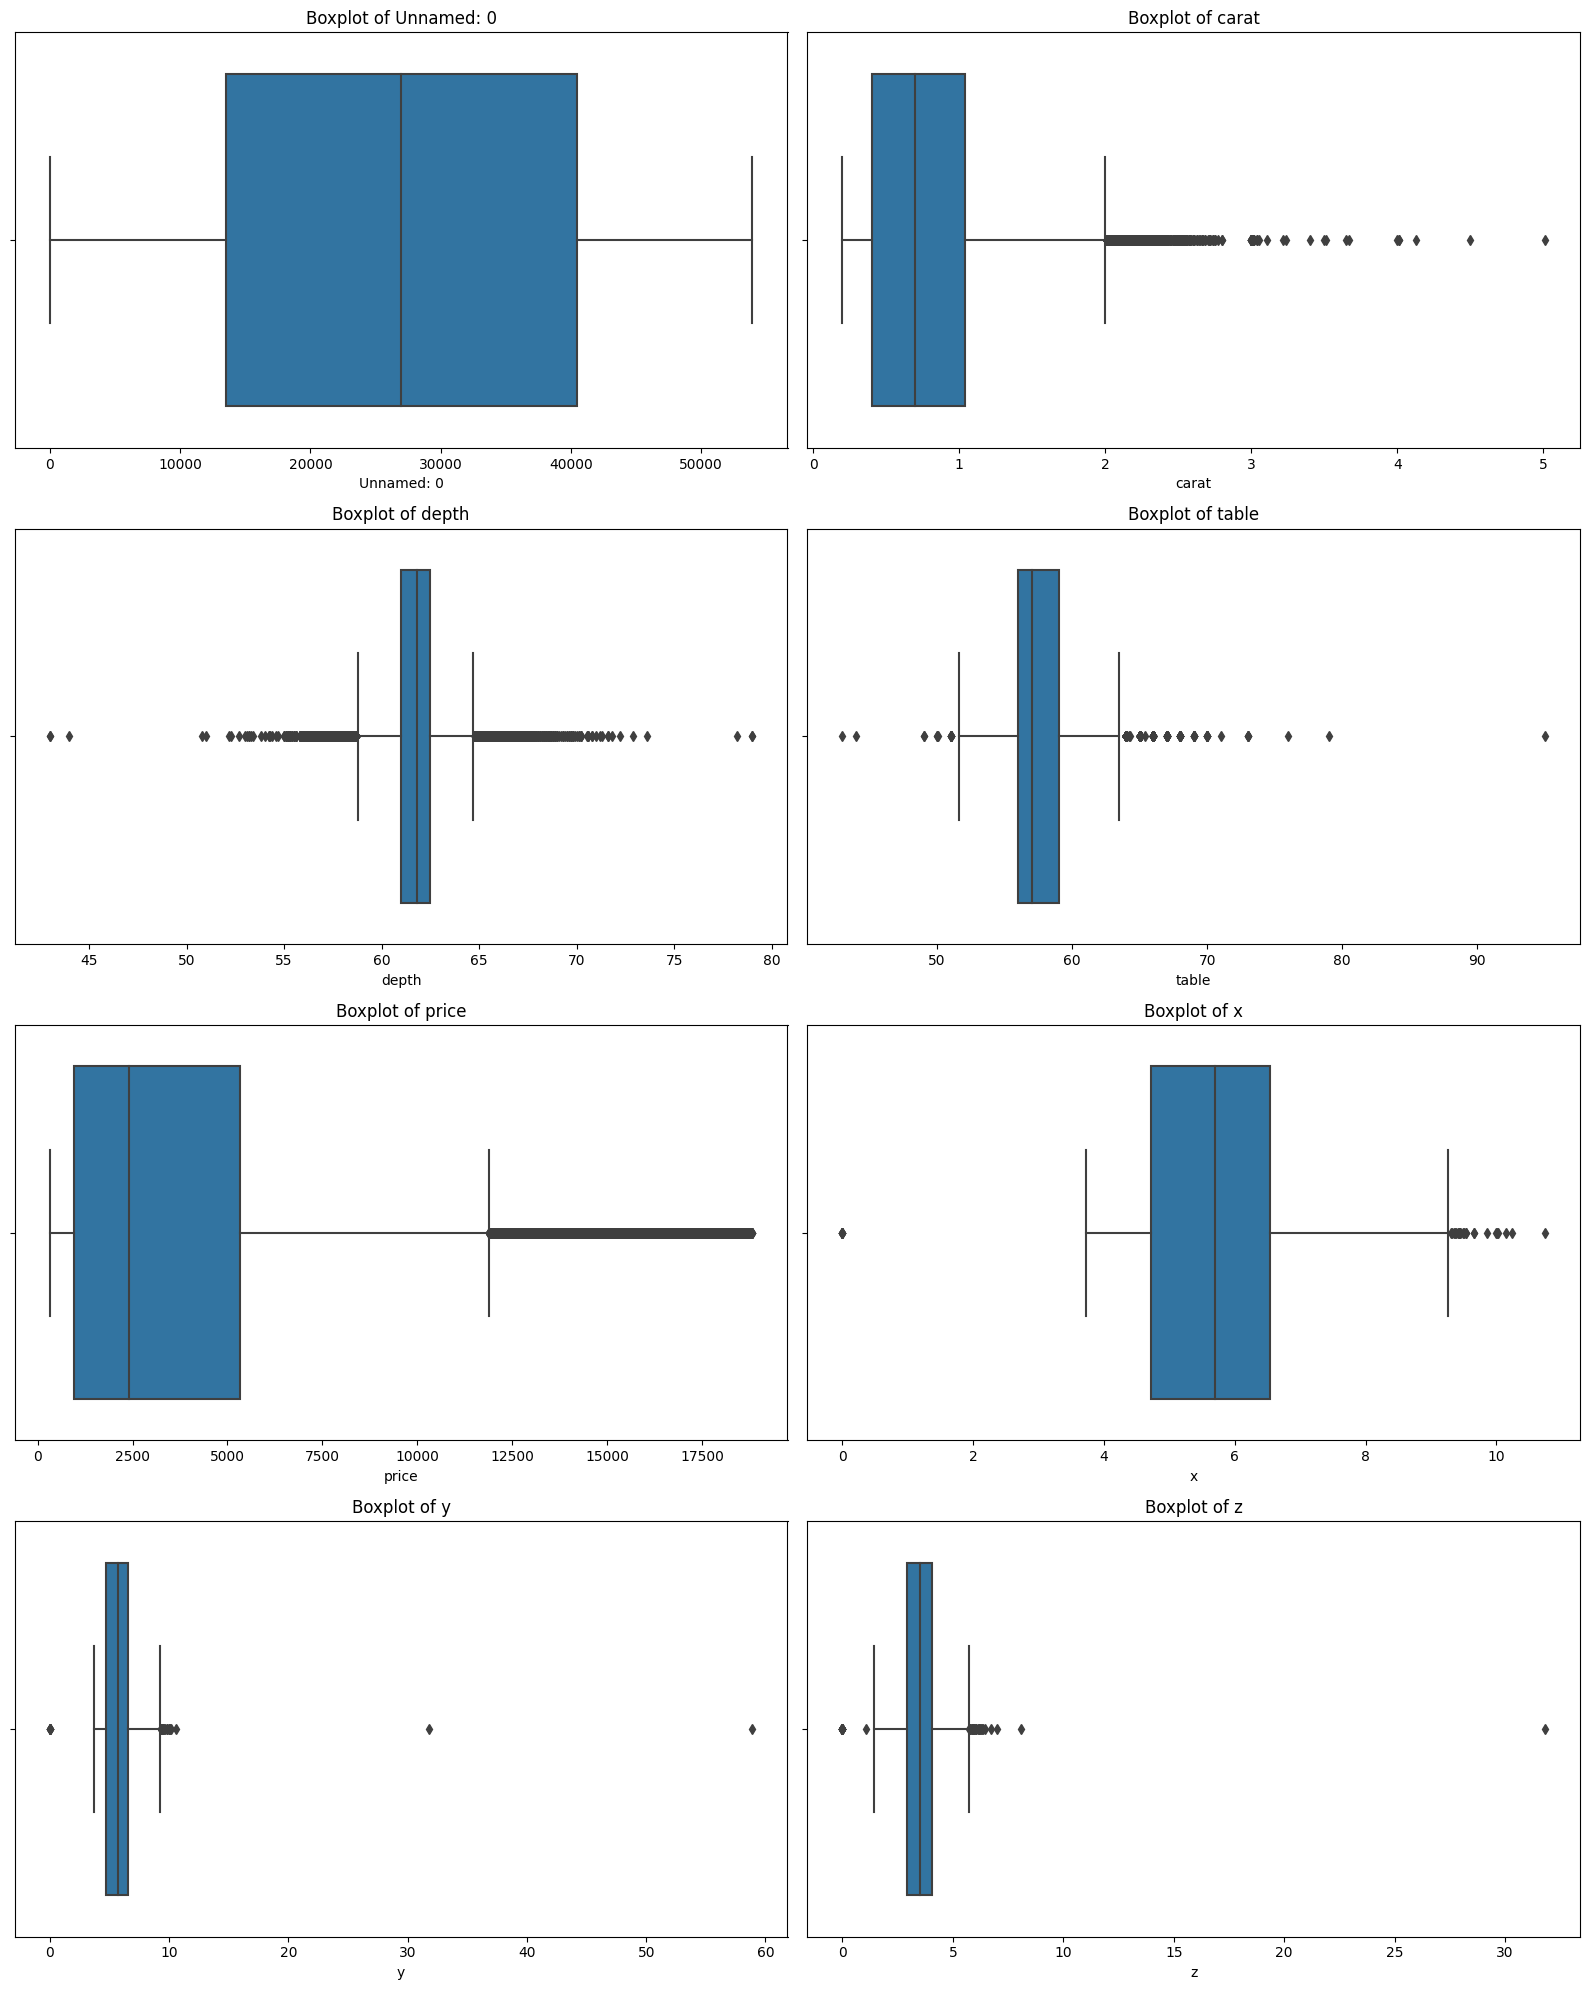

In [9]:
numerical_feature=Diamond_df.select_dtypes(include='number').columns
fig, axes=plt.subplots(4, 2, figsize=(16,20))
axes=axes.flatten()
for i, feature in enumerate(numerical_feature):
    sns.boxplot(x=Diamond_df[feature],ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

### Visualization between Color and Clarity

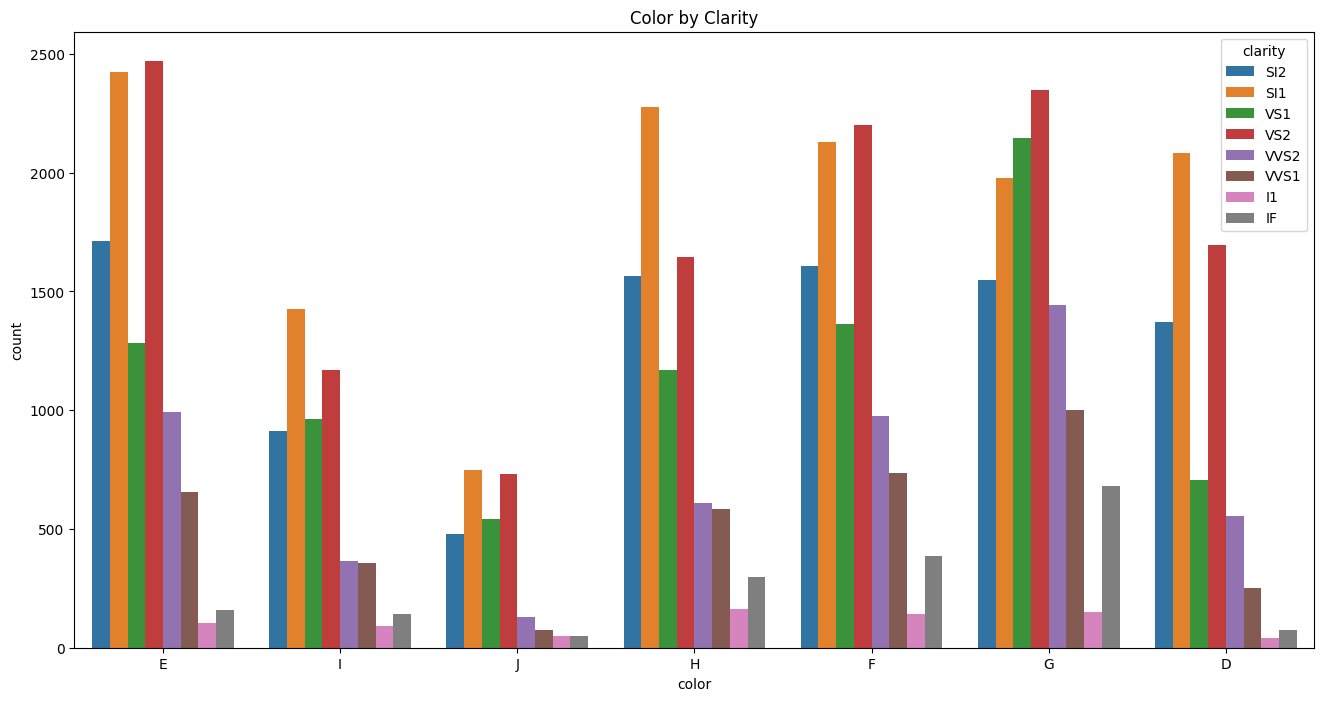

In [10]:
plt.figure(figsize=(16,8))
sns.countplot(data=Diamond_df, x='color', hue='clarity')
plt.title('Color by Clarity')
plt.show()

### Visualization between Color and Cut

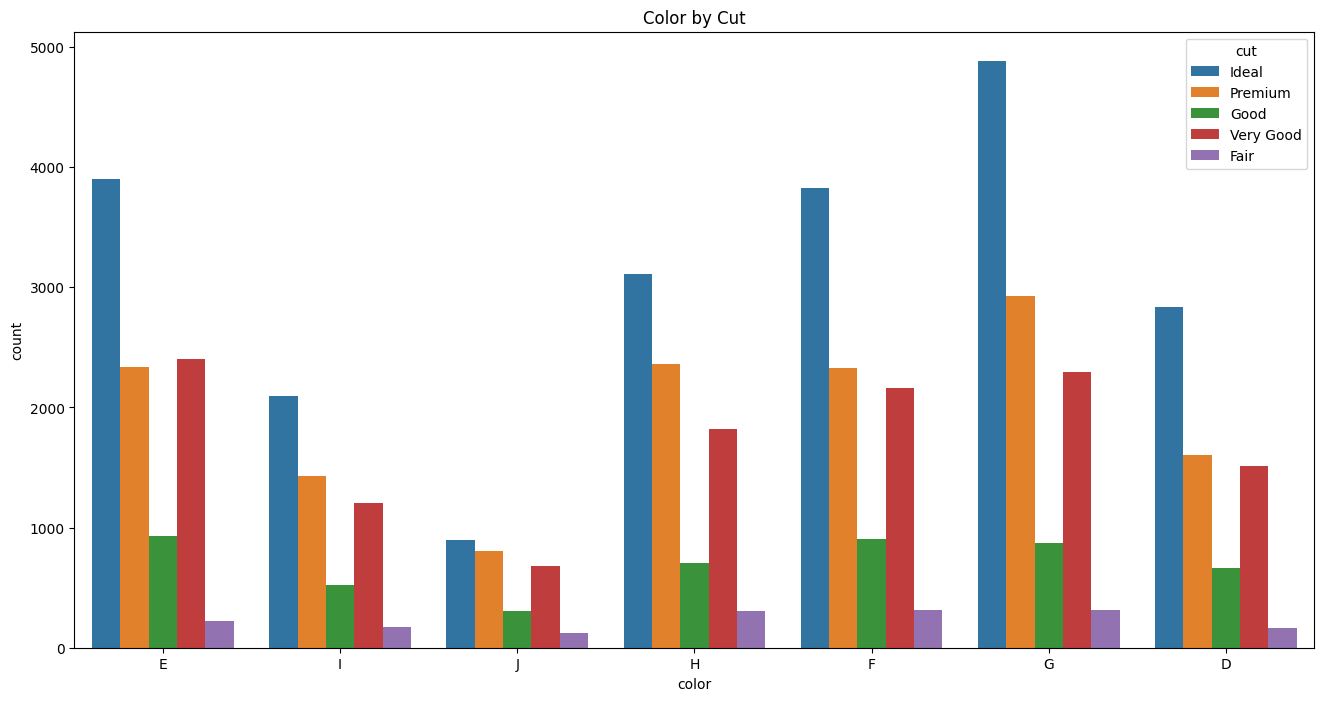

In [11]:
plt.figure(figsize=(16,8))
sns.countplot(data=Diamond_df, x='color',hue='cut')
plt.title('Color by Cut')
plt.show()

### Visualization between Cut and Clarity

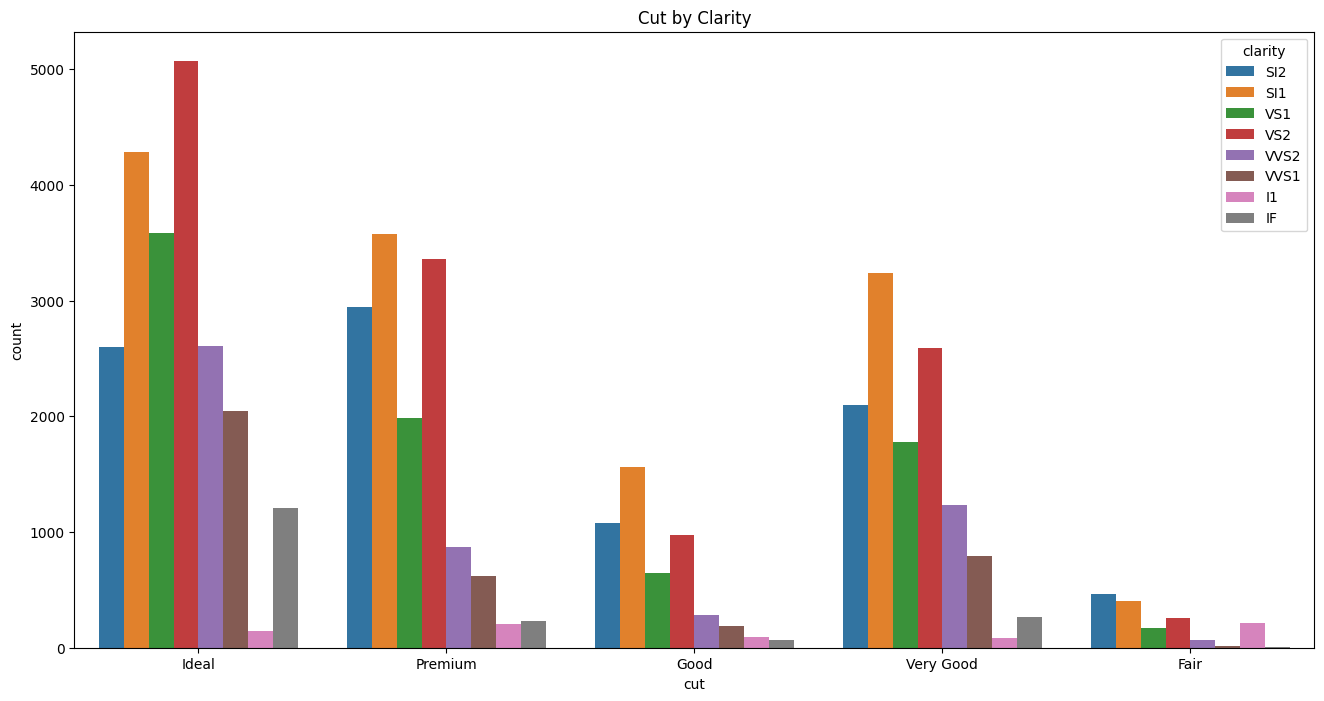

In [12]:
plt.figure(figsize=(16,8))
sns.countplot(data=Diamond_df, x='cut', hue='clarity')
plt.title('Cut by Clarity')
plt.show()

### Visualization of Diamond Dimensions and Price Based on Cut Quality

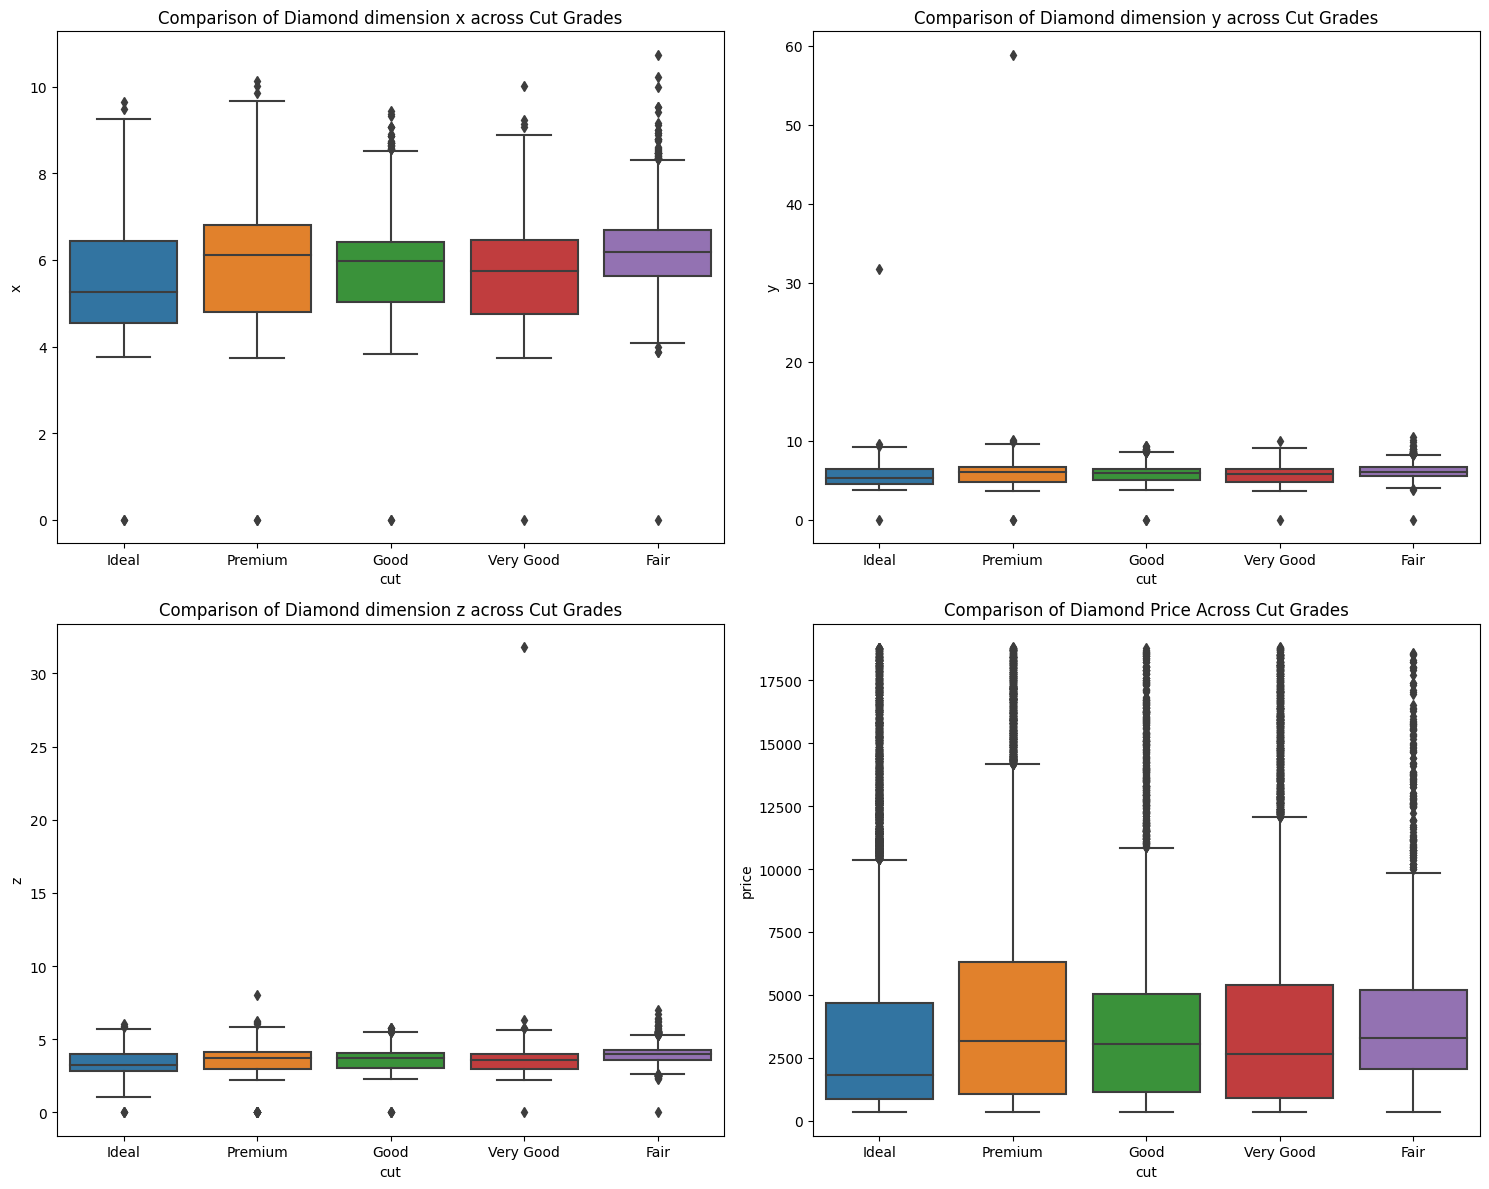

In [13]:
comparison=['x','y','z','price']
fig, axes=plt.subplots(2,2, figsize=(15,12))
axes=axes.flatten()
for i, feature in enumerate(comparison):
    sns.boxplot(data=Diamond_df,x='cut',y=feature,ax=axes[i])
    axes[i].set_title(f'Comparison of Diamond dimension {feature} across Cut Grades')
    if feature=='price':
        axes[i].set_title(f'Comparison of Diamond Price Across Cut Grades')

plt.tight_layout()
plt.show()

### Visualization of Carat Diamond Based on Cut

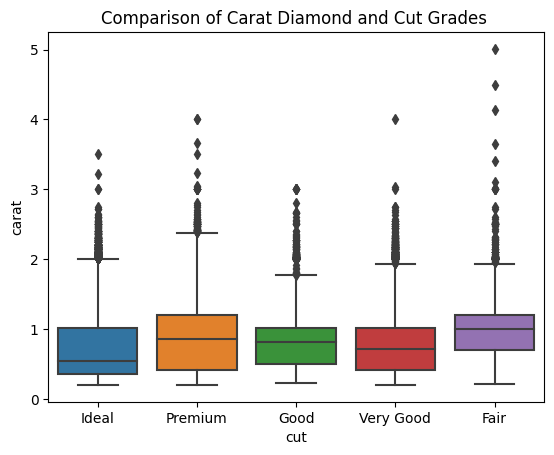

In [14]:
sns.boxplot(x='cut', y='carat', data=Diamond_df)
plt.title('Comparison of Carat Diamond and Cut Grades ')
plt.show()

# Preprocessing

## Drop Column

In [15]:
Diamond_clean=Diamond_df.drop(columns='Unnamed: 0')
Diamond_clean.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Outlier Handling

In [16]:
def outlier_handling(df,columns):
    df_cleaned=df.copy()
    for col in columns:
        if pd.api.types.is_numeric_dtype(df_cleaned[col]):
            Q1=df_cleaned[col].quantile(0.25)
            Q3=df_cleaned[col].quantile(0.75)
            IQR=Q3-Q1
            lower_bound=Q1- 1.5* IQR
            upper_bound=Q3+1.5 *IQR
            df_cleaned=df_cleaned[(df_cleaned[col] >=lower_bound) & (df_cleaned[col] <=upper_bound)]
    df_cleaned=df_cleaned.reset_index(drop=True)
    return df_cleaned

Diamond_clean=outlier_handling(Diamond_clean,columns=['carat','depth','table','price','x','y','z'])

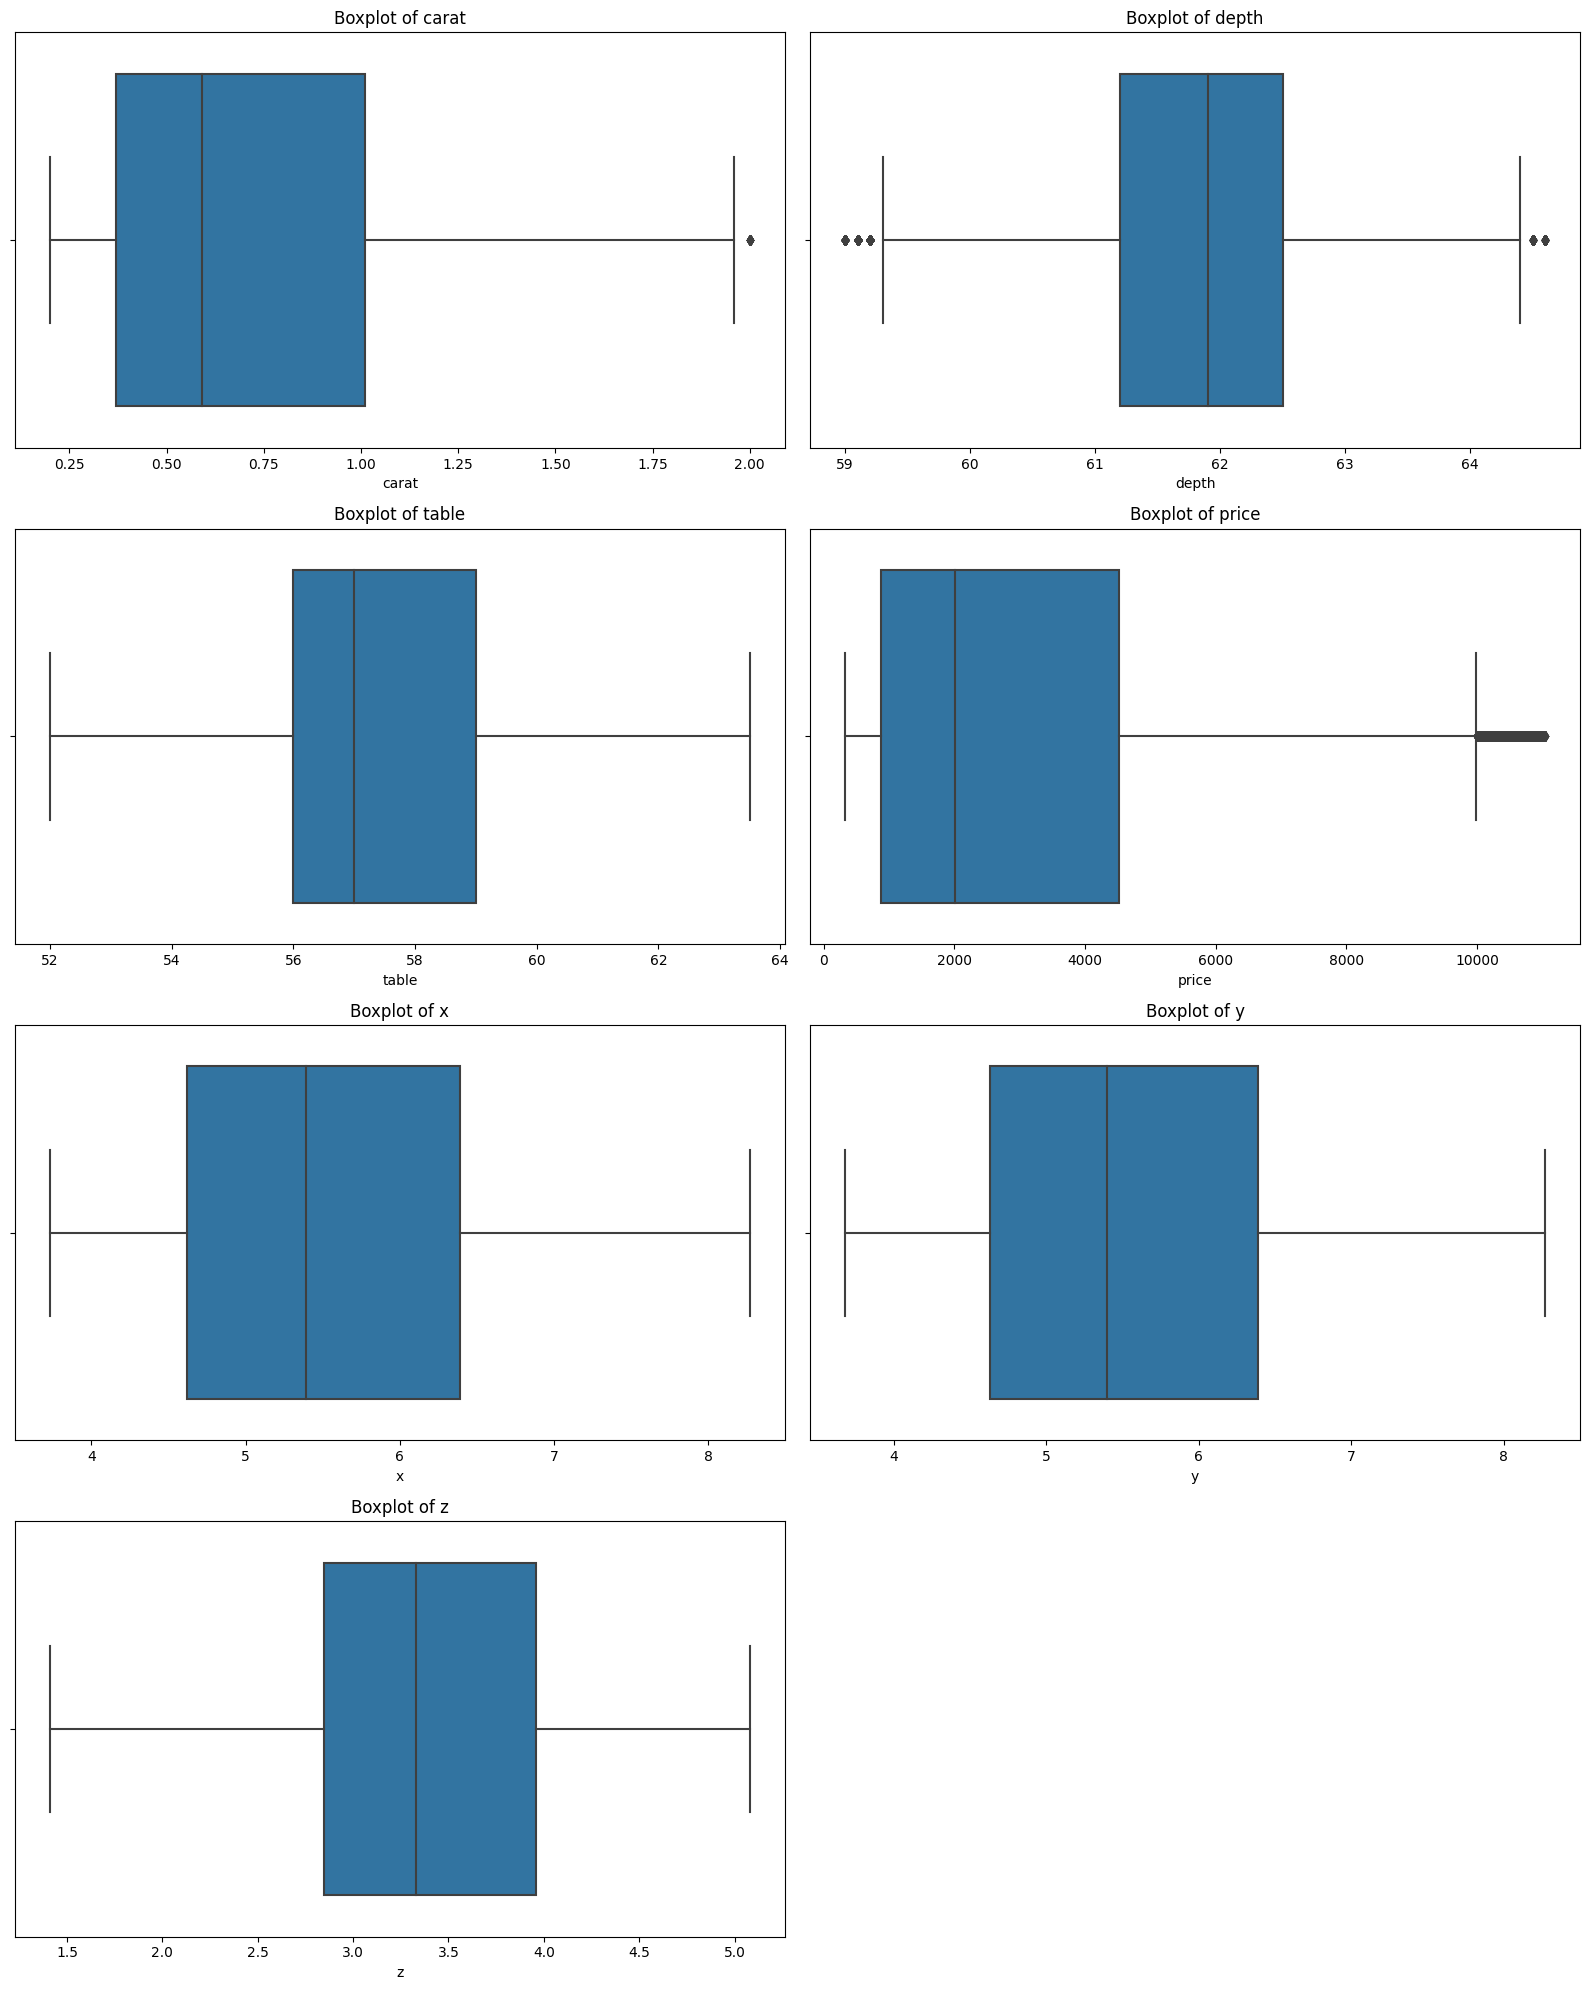

In [17]:
num_clean=Diamond_clean.select_dtypes(include='number').columns
fig,axes=plt.subplots(4,2,figsize=(16,20))
axes=axes.flatten()
for i, feature in enumerate(num_clean):
    sns.boxplot(x=Diamond_clean[feature], ax=axes[i])
    axes[i].set_title(f"Boxplot of {feature}")

for j in range(len(num_clean), len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

## Encoding

In [18]:
clarity_encoding = {
    "I1": 0,
    "SI2": 1,
    "SI1": 2,
    "VS2": 3,
    "VS1": 4,
    "VVS2": 5,
    "VVS1": 6,
    "IF": 7,
}

cut_encoding = {
    "Fair": 0,
    "Good": 1,
    "Very Good": 2,
    "Premium": 3,
    "Ideal": 4,
}

color_encoding = {
    "D": 6,
    "E": 5,
    "F": 4,
    "G": 3,
    "H": 2,
    "I": 1,
    "J": 0,
}

Diamond_clean['clarity'] = Diamond_clean['clarity'].map(clarity_encoding)
Diamond_clean['cut'] = Diamond_clean['cut'].map(cut_encoding)
Diamond_clean['color'] = Diamond_clean['color'].map(color_encoding)


Diamond_clean.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
3,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75
4,0.24,2,0,5,62.8,57.0,336,3.94,3.96,2.48


# Modelling

## Data Train and Data Test Split

In [19]:
X=Diamond_clean.drop(columns='price', axis=1)
y=Diamond_clean['price']

In [20]:
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
print(f"Data Training Shape : X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Data Testing Shape: X_test {X_test.shape}. y_test {y_test.shape}")


Data Training Shape : X_train (37225, 9), y_train (37225,)
Data Testing Shape: X_test (9307, 9). y_test (9307,)


## Linear Regression

In [21]:
LR=LinearRegression().fit(X_train, y_train)
eval_LR=LR.predict(X_test)

mse_LR= round(mean_squared_error(y_test, eval_LR), 3)
mae_LR= round(mean_absolute_error(y_test, eval_LR), 3)
r2_LR= round(r2_score(y_test, eval_LR), 3)


In [22]:
data=({
    "MAE":[mae_LR],
    "MSE":[mse_LR],
    "R2 Score":[r2_LR]
})
result=pd.DataFrame(data, index=['Linear Regression'])
result

,MAE,MSE,R2 Score
Linear Regression,529.884,570437.214,0.915


## Random Forest Regressor

In [23]:
RF=RandomForestRegressor().fit(X_train, y_train)
eval_RF=RF.predict(X_test)

mse_RF= round(mean_squared_error(y_test, eval_RF), 3)
mae_RF= round(mean_absolute_error(y_test, eval_RF), 3)
r2_RF= round(r2_score(y_test, eval_RF), 3)

In [24]:
result.loc['Random Forest']=[mae_RF,mse_RF, r2_RF]
result

,MAE,MSE,R2 Score
Linear Regression,529.884,570437.214,0.915
Random Forest,189.021,115020.735,0.983


## SVM

In [25]:
SVM=SVR().fit(X_train, y_train)
eval_SVM= SVM.predict(X_test)

mse_svm= round(mean_squared_error(y_test, eval_SVM),3)
mae_svm= round(mean_absolute_error(y_test, eval_SVM), 3)
r2_svm= round(r2_score(y_test, eval_SVM), 3)

In [26]:
result.loc['SVM']= [mae_svm, mse_svm, r2_svm]
result

,MAE,MSE,R2 Score
Linear Regression,529.884,570437.214,0.915
Random Forest,189.021,115020.735,0.983
SVM,1952.409,7522209.915,-0.117


## Decision Tree Regressor

In [27]:
DT=DecisionTreeRegressor().fit(X_train, y_train)
eval_DT= DT.predict(X_test)

mse_dt= round(mean_squared_error(y_test, eval_DT),3)
mae_dt= round(mean_absolute_error(y_test, eval_DT), 3)
r2_dt= round(r2_score(y_test, eval_DT),3)


In [28]:
result.loc['Decision Tree']=[mae_dt, mse_dt, r2_dt]
result

,MAE,MSE,R2 Score
Linear Regression,529.884,570437.214,0.915
Random Forest,189.021,115020.735,0.983
SVM,1952.409,7522209.915,-0.117
Decision Tree,251.154,213275.198,0.968
